In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

import seaborn as sns, matplotlib.pyplot as plt

In [2]:
#importing plotting libraries

from plotly.subplots import make_subplots
import plotly.graph_objects as go
pd.set_option('display.max_columns', 300)
plt.style.use('ggplot')

# Step 1: Reading the Lead dataset

In [3]:
Lead_dataset = pd.read_csv("Leads.csv")

# Step 2: Inspecting raw data & trying to understand the baseline

In [4]:
Lead_dataset.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
Lead_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [6]:
Lead_dataset.shape

(9240, 37)

In [7]:
Lead_dataset.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Checking details of conversions (0/1) from dataset

In [8]:
Lead_dataset["Converted"].sum()

3561

In [9]:
# Percentage of total conversions into Yes i.e., 1

Lead_dataset["Converted"].sum()/len(Lead_dataset)*100

38.53896103896104

In [10]:
# Checking for the duplicacy in "Prospect ID" & "Lead Number"

Lead_dataset.duplicated(subset = ['Prospect ID'], keep = False).sum()

0

In [11]:
Lead_dataset.duplicated(subset = ['Lead Number'], keep = False).sum()

0

#### INSIGHTS:--
- There are no duplicate rows in "Prospect ID" & "Lead Number" which indicates all data belongs to different customer & we can drop these two variables. 

# Step 3: EDA (Exploratory Data Analysis)
#### Data Cleaning & Treatment

In [12]:
# Drop the above two columns at first

Lead_dataset.drop(['Prospect ID', 'Lead Number'],1, inplace = True)

In [13]:
#Converting 'Select' values to NaN.

Lead_dataset = Lead_dataset.replace('Select', np.nan)

In [14]:
Lead_dataset.nunique()

Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article                                   2
X Education Forums                                  2
Newspaper                   

#### INSIGHTS:-
- Features having only 1 type of data will not help in prediction, so we will drop them.
- Dropping unique value columns

In [15]:
# Dropping unique valued columns

Lead_dataset.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque'], 1, inplace = True)

In [18]:
# Check for the NULL Values in dataset

Lead_dataset.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [19]:
# Percentage of null values

round(Lead_dataset.isnull().sum()/len(Lead_dataset)*100).sort_values(ascending = False).head(10),2

(How did you hear about X Education    78.0
 Lead Profile                          74.0
 Lead Quality                          52.0
 Asymmetrique Profile Score            46.0
 Asymmetrique Activity Score           46.0
 Asymmetrique Profile Index            46.0
 Asymmetrique Activity Index           46.0
 City                                  40.0
 Specialization                        37.0
 Tags                                  36.0
 dtype: float64,
 2)

In [20]:
# Dropping features having more than 45% of NULL VALUES

Lead_dataset.drop(['How did you hear about X Education', 'Lead Profile', 'Lead Quality', 'Asymmetrique Profile Score', 'Asymmetrique Activity Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Index'],1, inplace = True)

In [21]:
Lead_dataset.shape

(9240, 23)

In [22]:
# Recheck the Percentage of null values in the remained dataset

round(Lead_dataset.isnull().sum()/len(Lead_dataset)*100).sort_values(ascending = False).head(10),2

(City                                             40.0
 Specialization                                   37.0
 Tags                                             36.0
 What is your current occupation                  29.0
 What matters most to you in choosing a course    29.0
 Country                                          27.0
 TotalVisits                                       1.0
 Page Views Per Visit                              1.0
 Last Activity                                     1.0
 X Education Forums                                0.0
 dtype: float64,
 2)

#### INSIGHTS:-
- There are a number of features which are showing higher percentage of NULL values but the features are important to be dropped. 
- We need to convert them into "Not Available" in the TOP 6 features.

In [23]:
Lead_dataset['City'] = Lead_dataset['City'].fillna('Not Available')
Lead_dataset['Specialization'] = Lead_dataset['Specialization'].fillna('Not Available')
Lead_dataset['Tags'] = Lead_dataset['Tags'].fillna('Not Available')
Lead_dataset['What is your current occupation'] = Lead_dataset['What is your current occupation'].fillna('Not Available')
Lead_dataset['What matters most to you in choosing a course'] = Lead_dataset['What matters most to you in choosing a course'].fillna('Not Available')
Lead_dataset['Country'] = Lead_dataset['Country'].fillna('Not Available')
Lead_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 23 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        9240 

In [24]:
# Recheck the Percentage of null values in the remained dataset

round(Lead_dataset.isnull().sum()/len(Lead_dataset)*100).sort_values(ascending = False).head(10),2

(TotalVisits                               1.0
 Page Views Per Visit                      1.0
 Last Activity                             1.0
 Lead Origin                               0.0
 Search                                    0.0
 A free copy of Mastering The Interview    0.0
 City                                      0.0
 Tags                                      0.0
 Through Recommendations                   0.0
 Digital Advertisement                     0.0
 dtype: float64,
 2)

## Handling Categorical Variables

In [25]:
# Start with the "Country" feature

Lead_dataset['Country'].value_counts()

India                   6492
Not Available           2461
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [26]:
# Most of the traffic coming from India & a lot is "Not available" as well
# Defining a function "countries" and manipulate categories into limited to 3 

def countries(x):
    category = ""
    if x == "India":
        category = "India"
    elif x == "Not Available":
        category = "Not Available"
    else:
        category = "Foreign"
    return category

Lead_dataset['Country'] = Lead_dataset.apply(lambda x:countries(x['Country']), axis = 1)
Lead_dataset['Country'].value_counts()

India            6492
Not Available    2461
Foreign           287
Name: Country, dtype: int64

In [27]:
# India is the most common occurence among the non-missing values we can impute all not provided values with India

Lead_dataset['Country'] = Lead_dataset['Country'].replace('Not Available','India')
Lead_dataset['Country'].value_counts()

India      8953
Foreign     287
Name: Country, dtype: int64

In [28]:
# Checking the percent of lose if the null values are removed

round(100*(sum(Lead_dataset.isnull().sum(axis=1) > 1)/Lead_dataset.shape[0]),2)

1.48

In [29]:
Lead_dataset.shape

(9240, 23)

In [30]:
# Deleting rows having "NULL Values" 

Lead_dataset = Lead_dataset[Lead_dataset.isnull().sum(axis=1) <1]

In [31]:
Lead_dataset.shape

(9074, 23)

In [32]:
# Rechecking the percentage of missing values

round(100*(Lead_dataset.isnull().sum()/len(Lead_dataset.index)), 2)

Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                            0.0
Through Recommendations                       

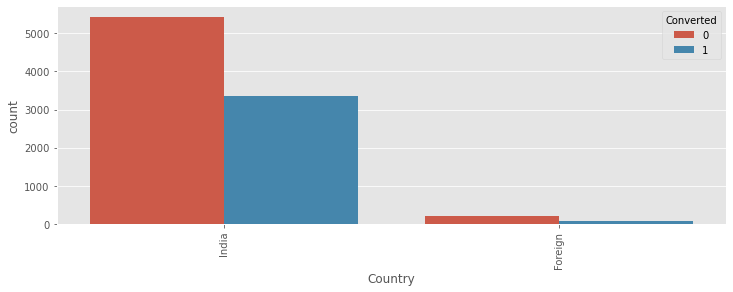

In [33]:
#plotting feature "Country"

plt.figure(figsize=(12,4))
s1=sns.countplot(Lead_dataset.Country, hue=Lead_dataset.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

- As most of the data around 95% belongs to India only, so we can drop this column 

In [34]:
# Create a separate column to select the dropped the features
col_to_be_dropped = Lead_dataset['Country']

In [35]:
col_to_be_dropped.head()

0    India
1    India
2    India
3    India
4    India
Name: Country, dtype: object

In [36]:
# Checking value counts of "City" column

Lead_dataset['City'].value_counts(dropna = False)

Not Available                  3575
Mumbai                         3177
Thane & Outskirts               745
Other Cities                    680
Other Cities of Maharashtra     446
Other Metro Cities              377
Tier II Cities                   74
Name: City, dtype: int64

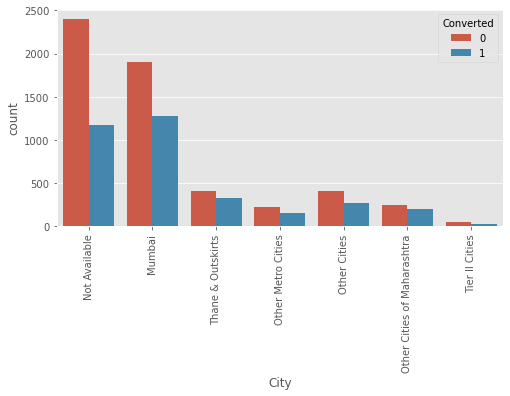

In [37]:
#plotting spread of City columnn

plt.figure(figsize = (8, 4))
s1=sns.countplot(Lead_dataset.City, hue=Lead_dataset.Converted)
s1.set_xticklabels(s1.get_xticklabels(),rotation=90)
plt.show()

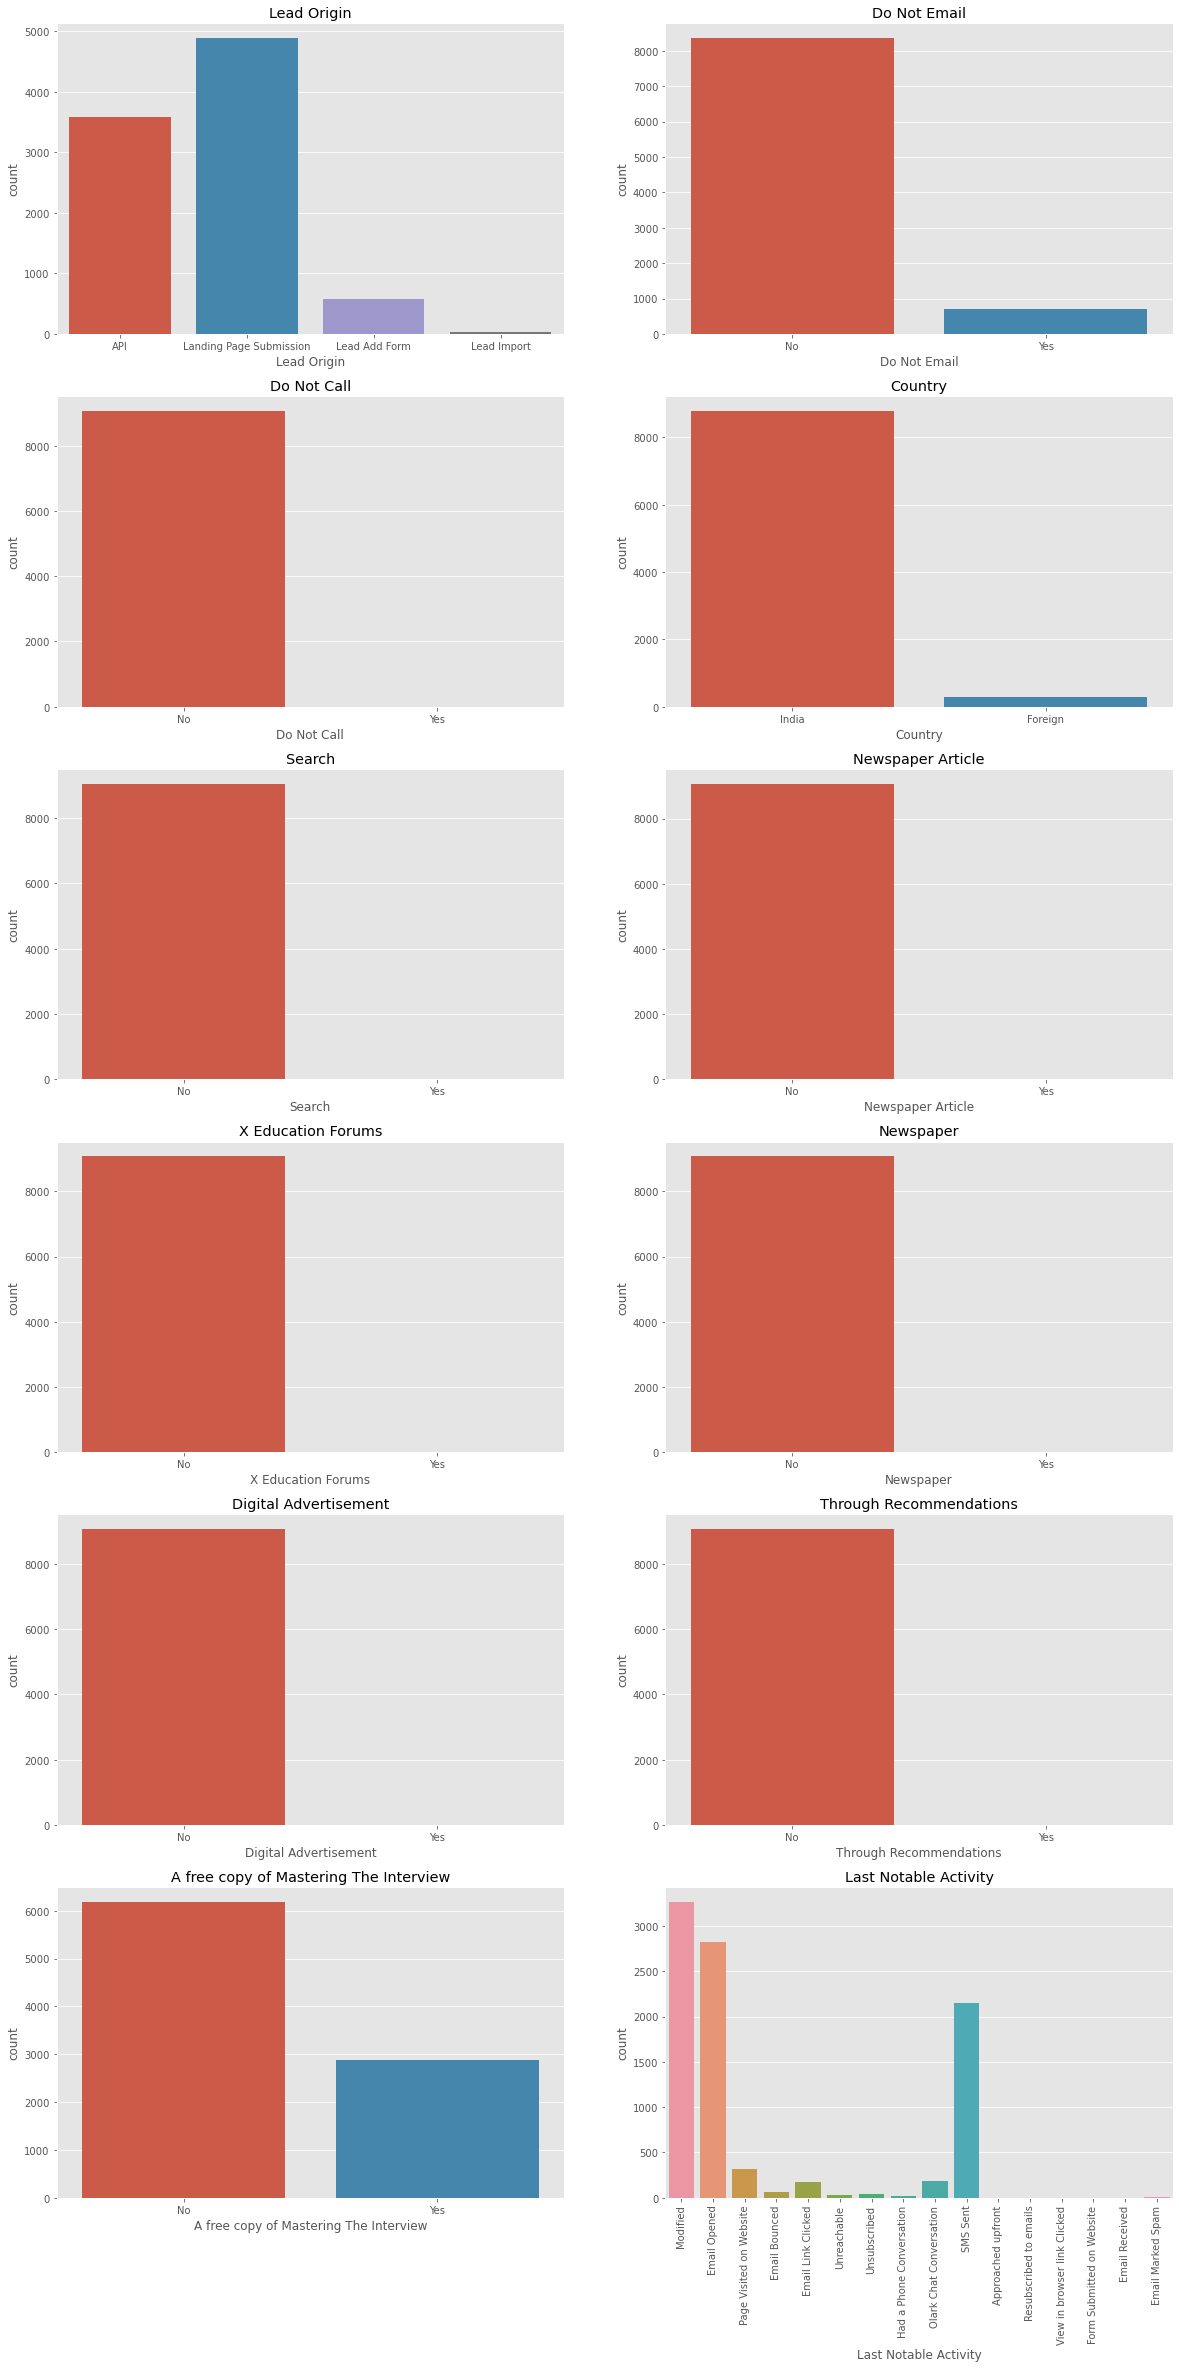

In [38]:
plt.figure(figsize = (20, 40))

plt.subplot(6,2,1)
sns.countplot(Lead_dataset['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(Lead_dataset['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(Lead_dataset['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(Lead_dataset['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(Lead_dataset['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(Lead_dataset['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(Lead_dataset['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(Lead_dataset['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(Lead_dataset['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(Lead_dataset['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(Lead_dataset['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(Lead_dataset['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

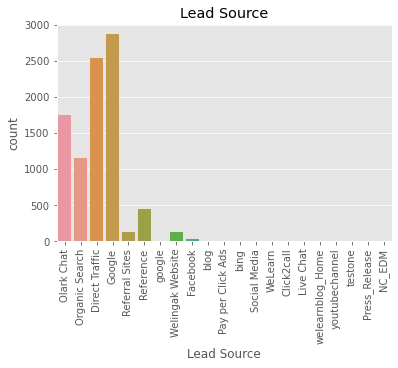

In [39]:
sns.countplot(Lead_dataset['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

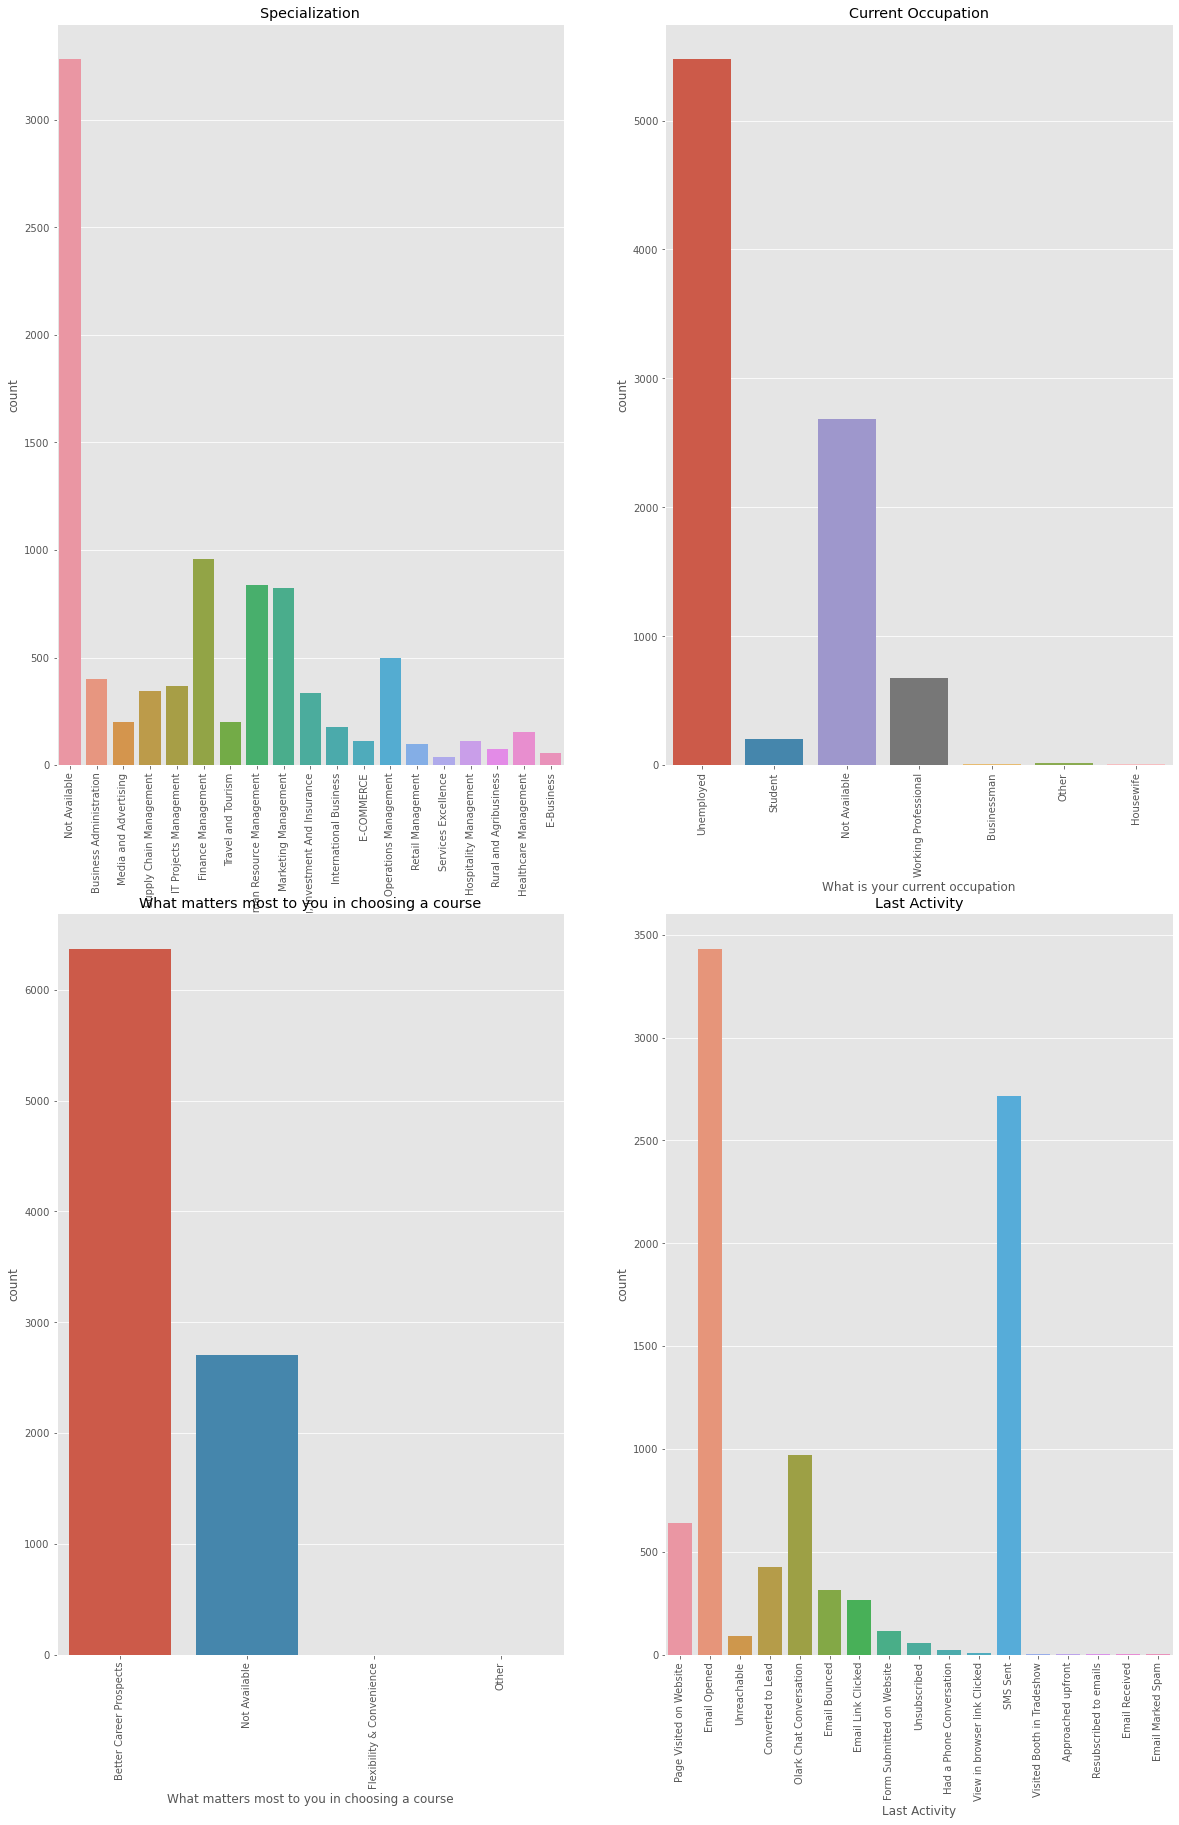

In [40]:
plt.figure(figsize = (20,30))

plt.subplot(2,2,1)
sns.countplot(Lead_dataset['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(2,2,2)
sns.countplot(Lead_dataset['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')

plt.subplot(2,2,3)
sns.countplot(Lead_dataset['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(2,2,4)
sns.countplot(Lead_dataset['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.show()

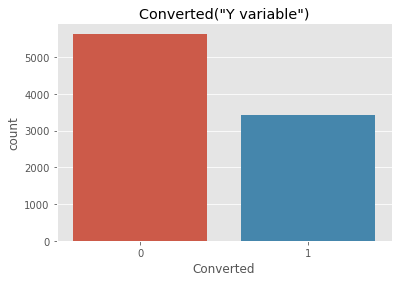

In [41]:
sns.countplot(Lead_dataset['Converted'])
plt.title('Converted("Y variable")')
plt.show()

## Handling Numerical Variables

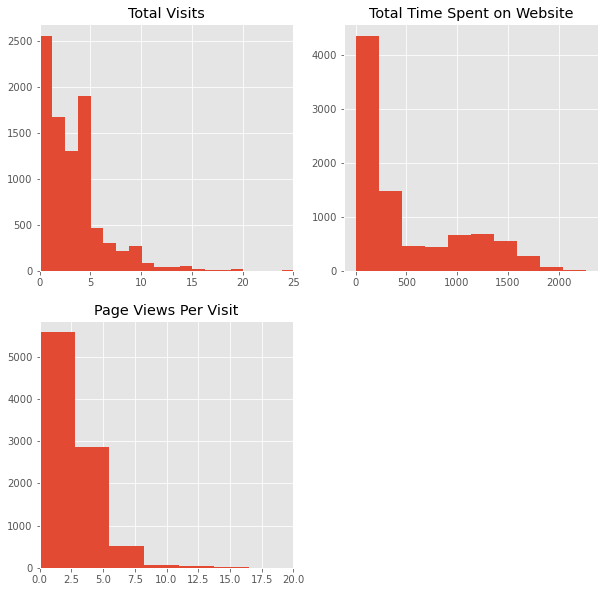

In [42]:
plt.figure(figsize = (10, 10))

plt.subplot(221)
plt.hist(Lead_dataset['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(Lead_dataset['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(Lead_dataset['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)

plt.show()    

## Relating all Categorical variables with the "Converted"

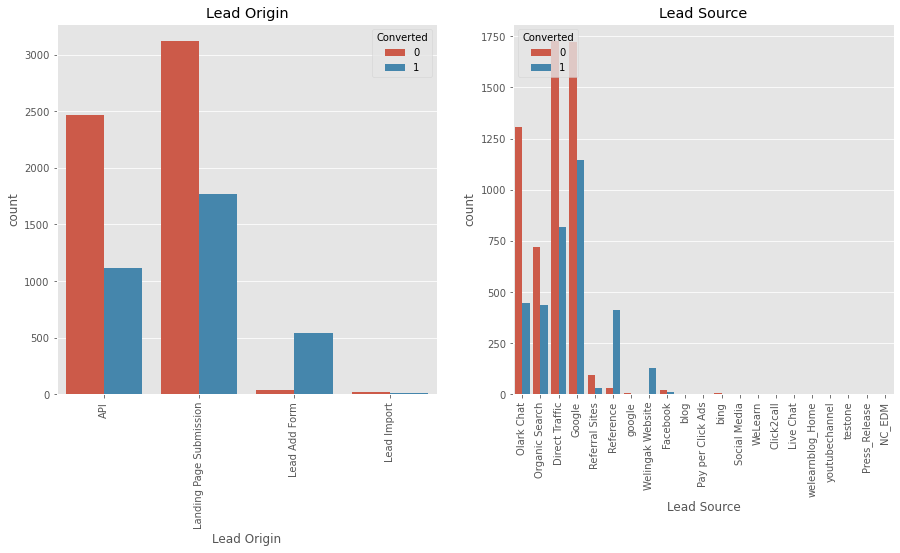

In [43]:
plt.figure(figsize = (15, 15))

plt.subplot(2,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(2,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.show()

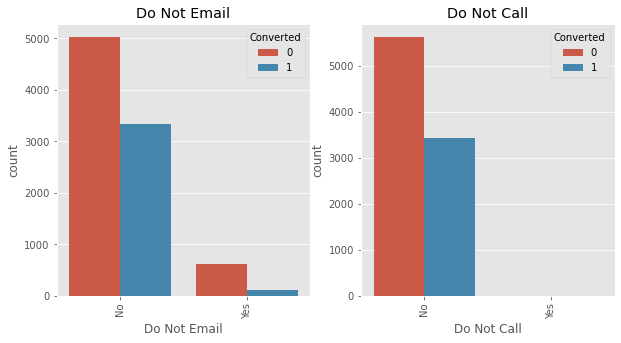

In [44]:
plt.figure(figsize=(10 ,5))
plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

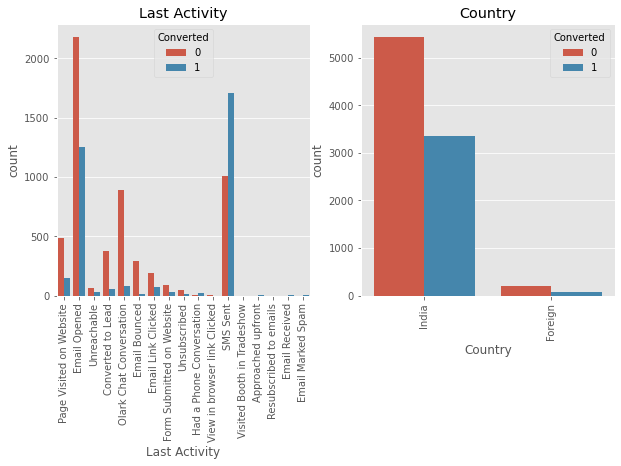

In [45]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('Country')

plt.show()

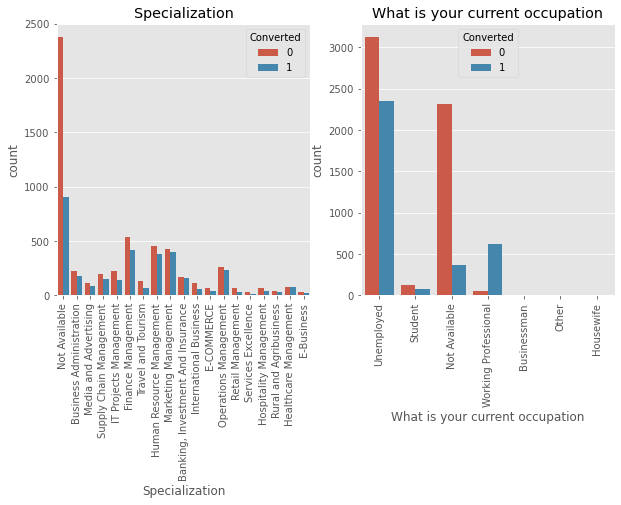

In [46]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')

plt.show()

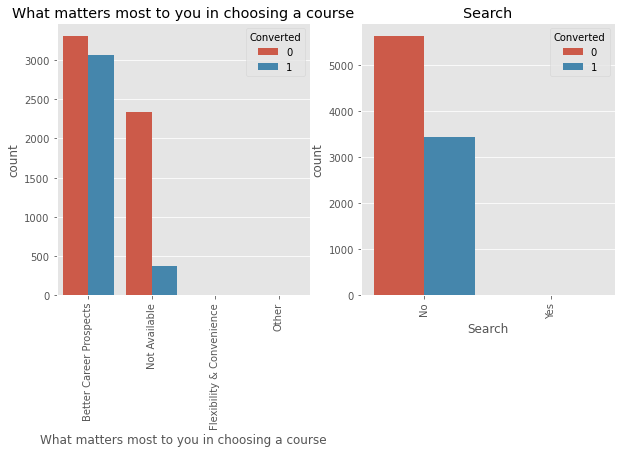

In [47]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('Search')

plt.show()

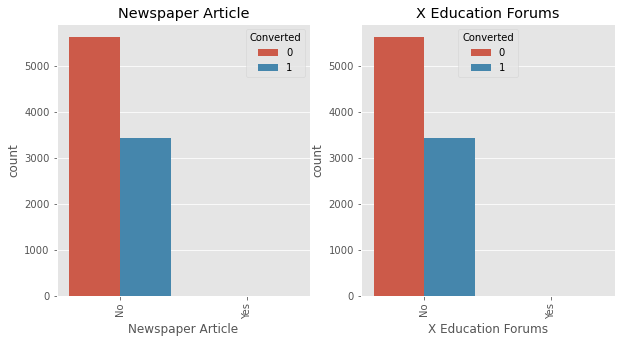

In [48]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')

plt.show()

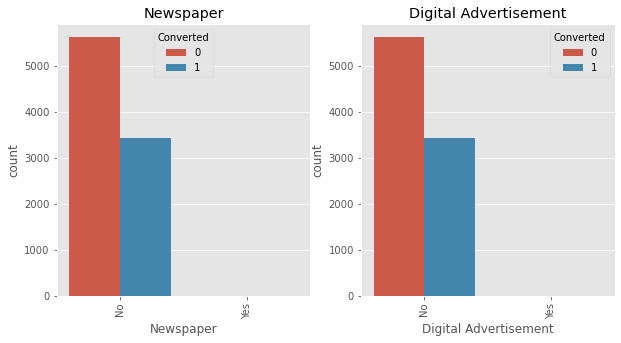

In [49]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')

plt.show()

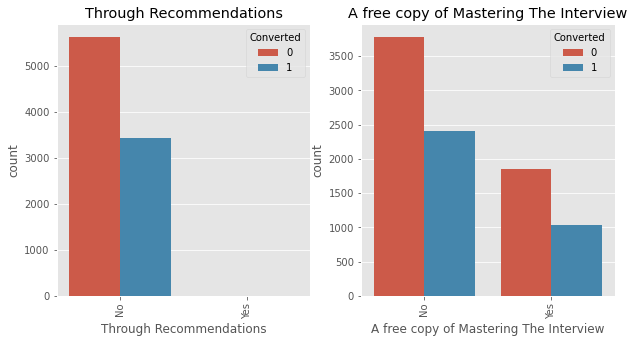

In [50]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.show()

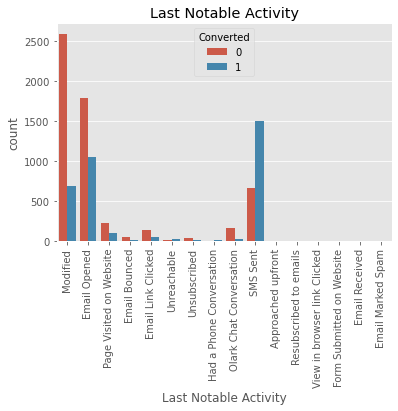

In [51]:
sns.countplot(x='Last Notable Activity', hue='Converted', data= Lead_dataset).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.show()

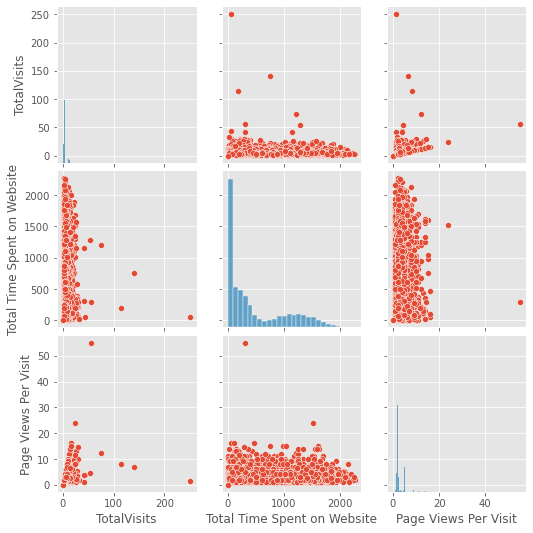

In [59]:
sns.pairplot(data = Lead_dataset, x_vars=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"],y_vars=["TotalVisits","Total Time Spent on Website","Page Views Per Visit"])
plt.show()

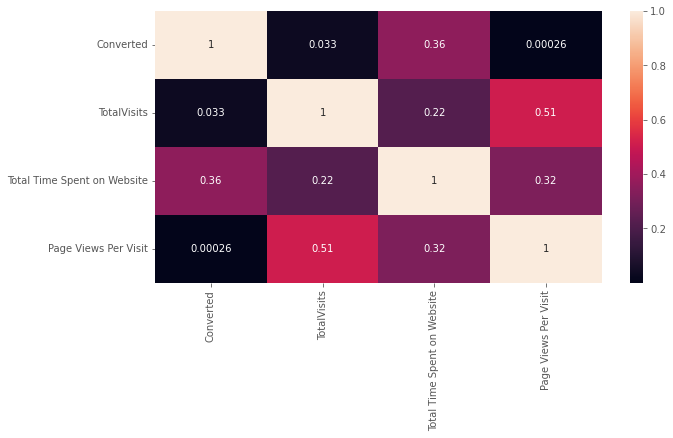

In [60]:
# To check the correlation among varibles

plt.figure(figsize=(10, 5))
sns.heatmap(Lead_dataset.corr(), annot = True)
plt.show()

#### INSIGHTS:-
- We can see that there is a lot of data which is of rarely related to each other for our analysis. 


## Handling OUTLIERS

In [61]:
numeric = Lead_dataset[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']]
numeric.describe(percentiles = [0.25, 0.5, 0.75, 0.9, 0.99, 1])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
100%,251.000000,2272.000000,55.000000


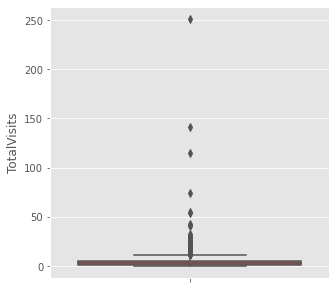

In [62]:
plt.figure(figsize = (5,5))
sns.boxplot(y=Lead_dataset['TotalVisits'])

plt.show()

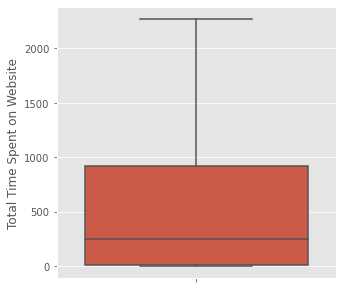

In [63]:
plt.figure(figsize = (5,5))
sns.boxplot(y=Lead_dataset['Total Time Spent on Website'])
plt.show()

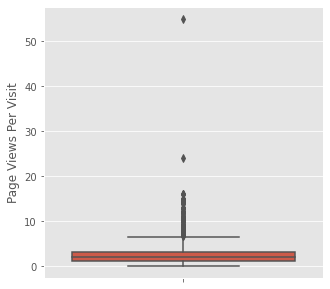

In [64]:
plt.figure(figsize = (5,5))
sns.boxplot(y=Lead_dataset['Page Views Per Visit'])

plt.show()

#### INSIGHTS:-
- We can see outliers present in "Total visits" feature

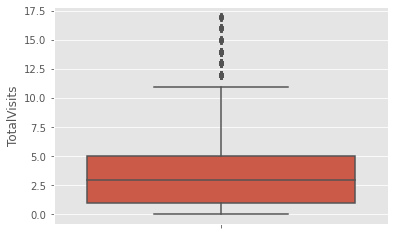

In [65]:
#Outliers Treatment: Remove top & bottom 1% of the Column Outlier values

Q3 = Lead_dataset.TotalVisits.quantile(0.99)
Lead_dataset = Lead_dataset[(Lead_dataset.TotalVisits <= Q3)]
Q1 = Lead_dataset.TotalVisits.quantile(0.01)
Lead_dataset = Lead_dataset[(Lead_dataset.TotalVisits >= Q1)]
sns.boxplot(y=Lead_dataset['TotalVisits'])
plt.show()

## Dummy Variables

In [66]:
#list of columns to be dropped
col_to_be_dropped=['Country','Tags']

In [67]:
#dropping columns

Lead_dataset = Lead_dataset.drop(col_to_be_dropped, 1)
Lead_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8991 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    8991 non-null   object 
 1   Lead Source                                    8991 non-null   object 
 2   Do Not Email                                   8991 non-null   object 
 3   Do Not Call                                    8991 non-null   object 
 4   Converted                                      8991 non-null   int64  
 5   TotalVisits                                    8991 non-null   float64
 6   Total Time Spent on Website                    8991 non-null   int64  
 7   Page Views Per Visit                           8991 non-null   float64
 8   Last Activity                                  8991 non-null   object 
 9   Specialization                                 8991 

In [68]:
# Getting a list of categorical columns

cat_cols= Lead_dataset.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [69]:
# Create dummy variables using the 'get_dummies'

dummy = pd.get_dummies(Lead_dataset[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
Lead_data_dum = pd.concat([Lead_dataset, dummy], axis=1)
Lead_data_dum.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,City,A free copy of Mastering The Interview,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Not Available,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Not Available,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Not Available,Unemployed,Better Career Prospects,No,No,No,No,No,No,Not Available,No,Modified,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Not Available,Unemployed,Better Career Prospects,No,No,No,No,No,No,Not Available,No,Email Opened,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,Mumbai,Yes,Email Opened,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,Lan

In [70]:
Lead_data_dum = Lead_data_dum.drop(['City','What is your current occupation_Not Available','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Specialization', 'Specialization_Not Available','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
Lead_data_dum

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.00,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,8.0,1845,2.67,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,

## Train-test split

In [71]:
# Import the required library

from sklearn.model_selection import train_test_split

In [72]:
X = Lead_data_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [73]:
# Putting the target variable in y

y = Lead_data_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [74]:
# Split the dataset into 70% and 30% for train and test respectively

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

In [75]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

# Scale the three numeric features

scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head(10)

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Do Not Email_Yes,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,A free copy of Mastering The Interview_Yes,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3523,0.117647,0.057218,0.0625,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3267,0.000000,0.000000,0.0000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5653,0.117647,0.404049,0.1250,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5072,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3704,0.235294,0.043134,0.2500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1790,0.176471,0.110475,0.1875,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2482,0.294118,0.190141,0.3125,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1694,0.000000,0.000000,0.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

## Logistic Regression MODEL BUILDING

## Model 1

In [76]:
# Import 'LogisticRegression'

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

# Import RFE

from sklearn.feature_selection import RFE

In [77]:
# Running RFE with 15 variables as output

rfe = RFE(lr, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [78]:
# Features that have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', False, 27),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 39),
 ('Specialization_Business Administration', False, 29),
 ('Specialization_E-Business', False, 23),
 ('Specialization_E-COMMERCE', False, 34),
 ('Specialization_Finance Management', False, 26),
 ('Specialization_Healthcare Management', False, 25),
 ('Specialization_Hospitality Management', False, 56),
 ('Specialization_Human Resource Management', False, 28),
 ('Specialization_IT Projects Management', False, 32),
 ('Specialization_International Business', False, 31),
 ('Specialization_Marketing Management', False, 24),
 ('Specialization_Media and Advertising', False, 51),
 ('Specialization_Operations Management', False, 35),
 ('Specialization_Retail Management', False, 64),
 ('Specialization_Rural and Agribusiness', False, 30),
 ('Specialization_Servi

In [79]:
# Put all the columns selected by RFE in the variable 'col'

col = X_train.columns[rfe.support_]

- All the variables selected by RFE, next statistics part (p-values and the VIFs)

In [80]:
# Selecting columns selected by RFE

X_train = X_train[col]

In [81]:
# Importing statsmodels

import statsmodels.api as sm

In [82]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6277
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2626.1
Date:                Sun, 05 Mar 2023   Deviance:                       5252.2
Time:                        00:03:44   Pearson chi2:                 6.39e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3882
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0499      0.089     -0.558      0.577      -0.225       0.125
TotalVisits                                              1.3774      0.288      4.782      0.000       0.813       1.942
Total Time Spent on Website                              4.2241      0.157     26.823      0.000       3.915       4.533
Page Views Per Visit                                    -3.3828      0.420     -8.061      0.000      -4.205      -2.560
Lead Origin_Lead Add Form                                3.5518      0.252     14.068      0.000       3.057       4.047
Lead Source_Direct Traffic                              -0.5590      0.078     -7.135      0.000      -0.713      -0.405
Lead Source_Welingak Website                             2.4910      1.043      2.388      0.017       0.447       4.535
Do Not Email_Yes                                        -1.7753      0.177    -10.034      0.000      -2.122      -1.429
Last Activity_Olark Chat Conversation                   -0.9804      0.191     -5.144      0.000      -1.354      -0.607
What is your current occupation_Housewife               22.2913   1.76e+04      0.001      0.999   -3.46e+04    3.46e+04
What is your current occupation_Working Professional     2.7197      0.189     14.384      0.000       2.349       3.090
Last Notable Activity_Email Link Clicked                -1.9390      0.268     -7.223      0.000      -2.465      -1.413
Last Notable Activity_Email Opened                      -1.4133      0.089    -15.922      0.000      -1.587      -1.239
Last Notable Activity_Modified                          -1.9367      0.097    -19.900      0.000      -2.127      -1.746
Last Notable Activity_Olark Chat Conversation           -1.6887      0.373     -4.530      0.000      -2.419      -0.958
Last Notable Activity_Page Visited on Website           -2.0669      0.212     -9.735      0.000      -2.483      -1.651
========================================================================================================================
"""

In [83]:
# Importing 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.26
0,TotalVisits,5.25
1,Total Time Spent on Website,2.02
12,Last Notable Activity_Modified,1.90
7,Last Activity_Olark Chat Conversation,1.71
11,Last Notable Activity_Email Opened,1.52
3,Lead Origin_Lead Add Form,1.50
4,Lead Source_Direct Traffic,1.46
5,Lead Source_Welingak Website,1.34
13,Last Notable Activity_Olark Chat Conversation,1.34


#### The VIF values seem fine but some p-values are 99 %. So removing ' What is your current occupation_Housewife','Last Notable Activity_Had a Phone Conversation'

In [85]:
X_train.drop(['What is your current occupation_Housewife'], 1, inplace = True)

## Model 2

In [86]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6278
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2629.4
Date:                Sun, 05 Mar 2023   Deviance:                       5258.7
Time:                        00:04:23   Pearson chi2:                 6.41e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3876
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.0509      0.089     -0.569      0.569      -0.226       0.124
TotalVisits                                              1.3677      0.288      4.749      0.000       0.803       1.932
Total Time Spent on Website                              4.2290      0.157     26.861      0.000       3.920       4.538
Page Views Per Visit                                    -3.3734      0.419     -8.042      0.000      -4.196      -2.551
Lead Origin_Lead Add Form                                3.5766      0.252     14.188      0.000       3.083       4.071
Lead Source_Direct Traffic                              -0.5582      0.078     -7.131      0.000      -0.712      -0.405
Lead Source_Welingak Website                             2.4649      1.043      2.363      0.018       0.421       4.509
Do Not Email_Yes                                        -1.7777      0.177    -10.045      0.000      -2.125      -1.431
Last Activity_Olark Chat Conversation                   -0.9835      0.191     -5.161      0.000      -1.357      -0.610
What is your current occupation_Working Professional     2.7168      0.189     14.367      0.000       2.346       3.087
Last Notable Activity_Email Link Clicked                -1.9278      0.267     -7.227      0.000      -2.451      -1.405
Last Notable Activity_Email Opened                      -1.4102      0.089    -15.892      0.000      -1.584      -1.236
Last Notable Activity_Modified                          -1.9330      0.097    -19.873      0.000      -2.124      -1.742
Last Notable Activity_Olark Chat Conversation           -1.6847      0.373     -4.519      0.000      -2.415      -0.954
Last Notable Activity_Page Visited on Website           -2.0652      0.212     -9.726      0.000      -2.481      -1.649
========================================================================================================================
"""

In [87]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Page Views Per Visit,5.26
0,TotalVisits,5.25
1,Total Time Spent on Website,2.02
11,Last Notable Activity_Modified,1.90
7,Last Activity_Olark Chat Conversation,1.71
10,Last Notable Activity_Email Opened,1.52
3,Lead Origin_Lead Add Form,1.49
4,Lead Source_Direct Traffic,1.46
5,Lead Source_Welingak Website,1.34
12,Last Notable Activity_Olark Chat Conversation,1.34


In [88]:
X_train.drop('Page Views Per Visit', axis = 1, inplace = True)

## Model 3

In [89]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6279
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.0
Date:                Sun, 05 Mar 2023   Deviance:                       5326.0
Time:                        00:04:32   Pearson chi2:                 6.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3810
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.2713      0.085     -3.186      0.001      -0.438      -0.104
TotalVisits                                             -0.2148      0.217     -0.992      0.321      -0.639       0.210
Total Time Spent on Website                              4.0568      0.154     26.368      0.000       3.755       4.358
Lead Origin_Lead Add Form                                3.7464      0.251     14.906      0.000       3.254       4.239
Lead Source_Direct Traffic                              -0.5699      0.078     -7.347      0.000      -0.722      -0.418
Lead Source_Welingak Website                             2.4634      1.043      2.362      0.018       0.419       4.507
Do Not Email_Yes                                        -1.7748      0.175    -10.154      0.000      -2.117      -1.432
Last Activity_Olark Chat Conversation                   -0.8634      0.190     -4.548      0.000      -1.236      -0.491
What is your current occupation_Working Professional     2.6939      0.188     14.317      0.000       2.325       3.063
Last Notable Activity_Email Link Clicked                -1.8062      0.265     -6.819      0.000      -2.325      -1.287
Last Notable Activity_Email Opened                      -1.3495      0.088    -15.399      0.000      -1.521      -1.178
Last Notable Activity_Modified                          -1.8865      0.096    -19.597      0.000      -2.075      -1.698
Last Notable Activity_Olark Chat Conversation           -1.5240      0.365     -4.179      0.000      -2.239      -0.809
Last Notable Activity_Page Visited on Website           -1.7007      0.202     -8.421      0.000      -2.097      -1.305
========================================================================================================================
"""

In [90]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,TotalVisits,2.37
1,Total Time Spent on Website,1.96
10,Last Notable Activity_Modified,1.86
6,Last Activity_Olark Chat Conversation,1.70
9,Last Notable Activity_Email Opened,1.50
2,Lead Origin_Lead Add Form,1.49
3,Lead Source_Direct Traffic,1.44
4,Lead Source_Welingak Website,1.34
11,Last Notable Activity_Olark Chat Conversation,1.34
7,What is your current occupation_Working Profes...,1.17


#### Model 3 has VIF values below 5 but “p” value for variable “TotalVisits” suddenly increased making it insignificant. So “TotalVisits” variable is dropped and model is rebuilt.


In [91]:
X_train.drop('TotalVisits', axis = 1, inplace = True)

In [92]:
# Refit the model with the new set of features

X_train_sm = sm.add_constant(X_train)
logm4 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6293
Model:                            GLM   Df Residuals:                     6280
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2663.5
Date:                Sun, 05 Mar 2023   Deviance:                       5327.0
Time:                        00:08:38   Pearson chi2:                 6.36e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3809
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3078      0.077     -4.005      0.000      -0.458      -0.157
Total Time Spent on Website                              4.0171      0.148     27.096      0.000       3.727       4.308
Lead Origin_Lead Add Form                                3.7810      0.249     15.190      0.000       3.293       4.269
Lead Source_Direct Traffic                              -0.5694      0.077     -7.347      0.000      -0.721      -0.417
Lead Source_Welingak Website                             2.4632      1.043      2.362      0.018       0.419       4.507
Do Not Email_Yes                                        -1.7703      0.175    -10.135      0.000      -2.113      -1.428
Last Activity_Olark Chat Conversation                   -0.8498      0.189     -4.485      0.000      -1.221      -0.478
What is your current occupation_Working Professional     2.6943      0.188     14.313      0.000       2.325       3.063
Last Notable Activity_Email Link Clicked                -1.8043      0.265     -6.810      0.000      -2.324      -1.285
Last Notable Activity_Email Opened                      -1.3518      0.088    -15.429      0.000      -1.524      -1.180
Last Notable Activity_Modified                          -1.8822      0.096    -19.582      0.000      -2.071      -1.694
Last Notable Activity_Olark Chat Conversation           -1.5347      0.365     -4.201      0.000      -2.251      -0.819
Last Notable Activity_Page Visited on Website           -1.7355      0.199     -8.727      0.000      -2.125      -1.346
========================================================================================================================
"""

In [93]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,Last Notable Activity_Modified,1.73
5,Last Activity_Olark Chat Conversation,1.70
0,Total Time Spent on Website,1.57
1,Lead Origin_Lead Add Form,1.48
2,Lead Source_Direct Traffic,1.43
3,Lead Source_Welingak Website,1.34
10,Last Notable Activity_Olark Chat Conversation,1.33
8,Last Notable Activity_Email Opened,1.32
6,What is your current occupation_Working Profes...,1.17
4,Do Not Email_Yes,1.13


- Model 4  has “p” values below 0.05 and VIF values below 5. Thus, this model is considered as final model.

## Creating Predictions

In [94]:
# Predicting the probabilities on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3523    0.123449
3267    0.997366
5653    0.353007
5072    0.159816
3704    0.184474
1790    0.148524
2482    0.193691
1694    0.100651
8768    0.166331
9225    0.012143
dtype: float64

In [95]:
# Reshaping to an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.12344923, 0.9973655 , 0.35300701, 0.15981627, 0.18447429,
       0.14852388, 0.19369125, 0.10065061, 0.16633091, 0.01214291])

In [96]:
# Data frame with given convertion rate and probablity of predicted ones

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.123449
1,1,0.997366
2,1,0.353007
3,0,0.159816
4,0,0.184474


In [97]:
# Substituting 0 or 1 with the cut off as 0.5

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.123449,0
1,1,0.997366,1
2,1,0.353007,0
3,0,0.159816,0
4,0,0.184474,0


## Model Evaluation

In [98]:
# Importing metrics from sklearn for evaluation

from sklearn import metrics

In [100]:
# Creating confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3471,  444],
       [ 826, 1552]], dtype=int64)

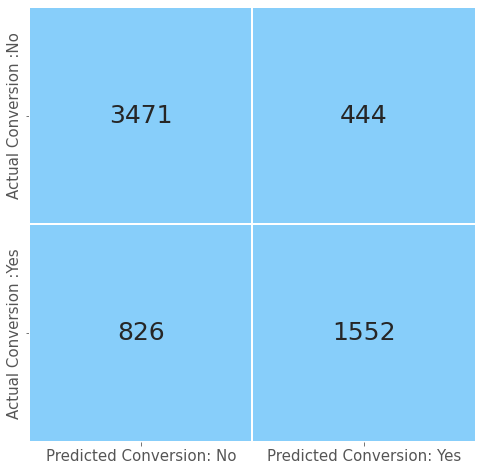

In [101]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,8))
#create a dataframe
conf_matrix = pd.DataFrame(data = confusion,columns = ['Predicted Conversion: No','Predicted Conversion: Yes'], 
                           index = ['Actual Conversion :No','Actual Conversion :Yes'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix, annot = True,fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [102]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7981884633720007

- Around 80% is really good accuracy

In [103]:
# Substituting the value of true positive

TP = confusion[1,1]

# Substituting the value of true negatives

TN = confusion[0,0]

# Substituting the value of false positives

FP = confusion[0,1] 

# Substituting the value of false negatives

FN = confusion[1,0]

In [104]:
# Calculating the sensitivity

TP/(TP+FN)

0.6526492851135408

In [105]:
# Calculating the specificity

TN/(TN+FP)

0.8865900383141763

- While taking the cut-off as 0.5, accuracy is 80%, sensitivity is 65% & Specificity is 89% 

## Finding ROC Curve

- 0.5 was the random cut-off value, Now tring to find out the cut-off value  using ROC Curve

In [106]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs, drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [107]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

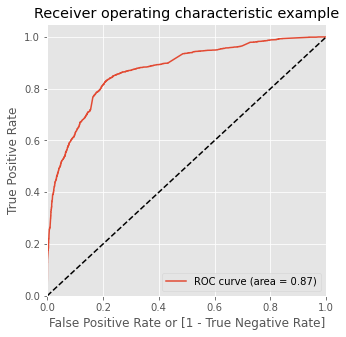

In [108]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

- ROC curve area is 87%, which is really good

In [109]:
# Creating columns with different probability cutoffs

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.123449,0,1,1,0,0,0,0,0,0,0,0
1,1,0.997366,1,1,1,1,1,1,1,1,1,1,1
2,1,0.353007,0,1,1,1,1,0,0,0,0,0,0
3,0,0.159816,0,1,1,0,0,0,0,0,0,0,0
4,0,0.184474,0,1,1,0,0,0,0,0,0,0,0


In [110]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity

from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.377880,1.000000,0.000000
0.1,0.1,0.540124,0.978974,0.273563
0.2,0.2,0.750040,0.879731,0.671264
0.3,0.3,0.798030,0.842725,0.770881
0.4,0.4,0.809312,0.784693,0.824266
0.5,0.5,0.798188,0.652649,0.886590
0.6,0.6,0.792309,0.568545,0.928225
0.7,0.7,0.781503,0.492010,0.957344
0.8,0.8,0.764341,0.417157,0.975223
0.9,0.9,0.715080,0.261564,0.990549


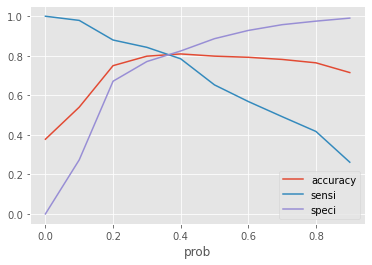

In [111]:
# Plot accuracy, sensitivity, specificity

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

- From the graph it is visible that the optimal cut off is at 0.36.

In [112]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.36 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.123449,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.997366,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.353007,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.159816,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.184474,0,1,1,0,0,0,0,0,0,0,0,0


In [113]:
# Check the overall accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8064516129032258

In [114]:
# Creating confusion matrix

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3148,  767],
       [ 451, 1927]], dtype=int64)

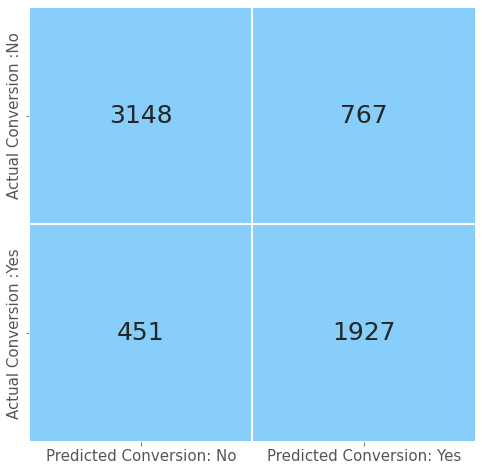

In [115]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,8))
#create a dataframe
conf_matrix2 = pd.DataFrame(data = confusion2,columns = ['Predicted Conversion: No','Predicted Conversion: Yes'], 
                           index = ['Actual Conversion :No','Actual Conversion :Yes'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix2, annot = True,fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [116]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [117]:
# Calculating the sensitivity
TP/(TP+FN)

0.8103448275862069

In [118]:
# Calculating the specificity
TN/(TN+FP)

0.8040868454661558

- With the current cut off as 0.36 we have accuracy, sensitivity and specificity of around 80%

## Prediction on Test set

In [119]:
# Scaling numeric values
    
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
col = X_train.columns

In [120]:
# Select the columns in X_train for X_test as well

X_test = X_test[col]

In [121]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test[col])
X_test_sm

,const,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Direct Traffic,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Olark Chat Conversation,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website
3308,1.0,0.050176,0,0,0,0,0,0,0,1,0,0,0
4421,1.0,0.000000,0,0,0,0,0,0,0,0,0,0,0
8855,1.0,0.547975,0,1,0,0,0,0,0,0,1,0,0
5302,1.0,0.000000,0,0,0,0,1,0,0,0,1,0,0
2169,1.0,0.390405,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5655,1.0,0.218310,0,1,0,0,0,0,0,0,1,0,0
7836,1.0,0.227113,0,0,0,0,0,1,1,0,0,0,0
8378,1.0,0.179577,0,0,0,1,0,0,0,0,0,0,1
1263,1.0,0.376320,0,1,0,0,0,1,0,0,0,0,0


In [122]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.188768
1,1,0.423653
2,1,0.363987
3,0,0.045659
4,0,0.340592


In [123]:
# Making prediction using cut off 0.36

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.36 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.188768,0
1,1,0.423653,1
2,1,0.363987,1
3,0,0.045659,0
4,0,0.340592,0
...,...,...,...
2693,1,0.132113,0
2694,1,0.816757,1
2695,0,0.043430,0
2696,1,0.965406,1


In [124]:
# Check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8042994810971089

In [125]:
# Creating confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1346,  331],
       [ 197,  824]], dtype=int64)

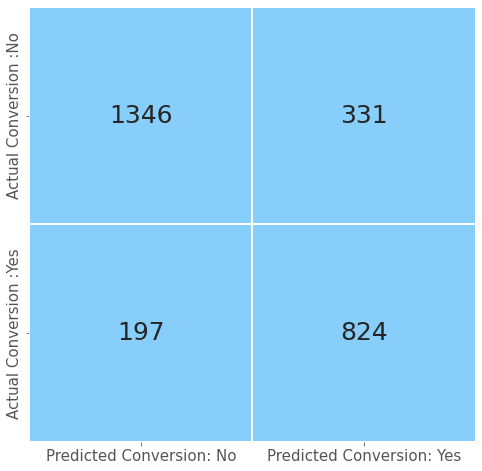

In [126]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,8))
#create a dataframe
conf_matrix2 = pd.DataFrame(data = confusion2,columns = ['Predicted Conversion: No','Predicted Conversion: Yes'], 
                           index = ['Actual Conversion :No','Actual Conversion :Yes'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix2, annot = True,fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [127]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [128]:
# Calculating the sensitivity

TP/(TP+FN)

0.8070519098922625

In [129]:
# Calculating the specificity

TN/(TN+FP)

0.802623732856291

- With the current cut off as 0.36 we have accuracy, sensitivity and specificity of around 80%

## Precision & Recall

In [130]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3471,  444],
       [ 826, 1552]], dtype=int64)

In [131]:
# Precision = TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7775551102204409

In [132]:
#Recall = TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6526492851135408

- Taking 0.36 cut-off, Precision is about 78% & Recall is about 65%

## Precision and recall tradeoff

In [133]:
from sklearn.metrics import precision_recall_curve

y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       1
 2       1
 3       0
 4       0
        ..
 6288    1
 6289    1
 6290    1
 6291    0
 6292    1
 Name: Converted, Length: 6293, dtype: int64,
 0       0
 1       1
 2       0
 3       0
 4       0
        ..
 6288    1
 6289    0
 6290    1
 6291    0
 6292    1
 Name: Predicted, Length: 6293, dtype: int64)

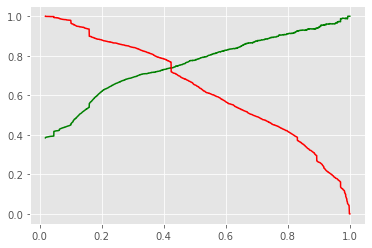

In [134]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [135]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.123449,0,1,1,0,0,0,0,0,0,0,0,0
1,1,0.997366,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.353007,0,1,1,1,1,0,0,0,0,0,0,0
3,0,0.159816,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.184474,0,1,1,0,0,0,0,0,0,0,0,0


In [138]:
# Accuracy

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8104242809470841

In [139]:
# Creating confusion matrix again

confusion3 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion3

array([[3268,  647],
       [ 546, 1832]], dtype=int64)

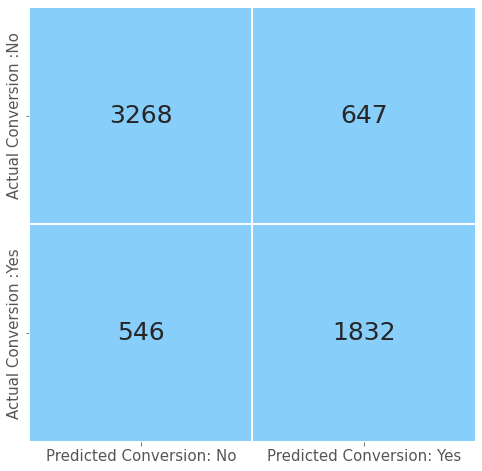

In [140]:
from matplotlib.colors import ListedColormap
plt.figure(figsize=(8,8))
#create a dataframe
conf_matrix3 = pd.DataFrame(data = confusion3,columns = ['Predicted Conversion: No','Predicted Conversion: Yes'], 
                           index = ['Actual Conversion :No','Actual Conversion :Yes'])

# plot a heatmap to visualize the confusion matrix
# 'annot' prints the value of each grid 
# 'fmt = d' returns the integer value in each grid
# 'cmap' assigns color to each grid
# as we do not require different colors for each grid in the heatmap,
# use 'ListedColormap' to assign the specified color to the grid
# 'cbar = False' will not return the color bar to the right side of the heatmap
# 'linewidths' assigns the width to the line that divides each grid
# 'annot_kws = {'size':25})' assigns the font size of the annotated text 
sns.heatmap(conf_matrix3, annot = True,fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})

plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

In [141]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [142]:
# Precision = TP / TP + FP

TP / (TP + FP)

0.7390076643807987

In [143]:
#Recall = TP / TP + FN

TP / (TP + FN)

0.7703952901597981

- Taking cut-off 0.42, Accuracy is 81% Precision is about 74% & recall is about 77%

## Prediction on Test set

In [144]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res.predict(X_test_sm)

# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)

# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)

# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.188768
1,1,0.423653
2,1,0.363987
3,0,0.045659
4,0,0.340592


In [145]:
# Making prediction using cut off 0.44

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)
y_pred_final

,Converted,Conversion_Prob,final_predicted
0,0,0.188768,0
1,1,0.423653,0
2,1,0.363987,0
3,0,0.045659,0
4,0,0.340592,0
...,...,...,...
2693,1,0.132113,0
2694,1,0.816757,1
2695,0,0.043430,0
2696,1,0.965406,1


## Check the overall accuracy

In [146]:
# Check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.7905856189770201

In [147]:
# Creating confusion matrix

confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1417,  260],
       [ 305,  716]], dtype=int64)

In [148]:
# Substituting the value of true positive
TP = confusion2[1,1]

# Substituting the value of true negatives
TN = confusion2[0,0]

# Substituting the value of false positives
FP = confusion2[0,1] 

# Substituting the value of false negatives
FN = confusion2[1,0]

In [149]:
# Precision = TP / TP + FP

TP / (TP + FP)

0.7336065573770492

In [150]:
#Recall = TP / TP + FN

TP / (TP + FN)

0.7012732615083251

- With the current cut off as 0.36 we have accuracy, sensitivity and specificity of around 80% and Precision is about 78%.

- Taking cut-off 0.44, Accuracy is 79% Precision is about 73% & recall is about 70%

- The Model seems to predict the Conversion Rate very well and we should be able to give the CEO confidence in making good calls based on this model


# CONCLUSION

It was found that the variables that mattered the most in the potential buyers are (In descending order):

## Total Time Spent on Website
## Lead Origin_Lead Add Form
## What is your current occupation_Working Professional
## Lead Source_Welingak Website
## Lead Source_Direct Traffic
## Last Acitivity_Olark Chat Conversation
## Last Notable Acitivity_Email Opened
## Last Notable Acitivity_Olark Chat Conversation
## Last Notable Activity_Page Visited on Website
## Do Not Email_Yes
## Last Notable Acitivity_Email Link Clicked
## Last Notable Acitivity_Modified


As we can see there are a number of Features which can be taken care-of for conversion of the potential buyers of the course utilising these features.